In [13]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

In [14]:
%matplotlib inline

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,10

# 1.Загрузить файл hr.csv.

In [209]:
data=pd.read_csv('hr.csv')

In [5]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [ ]:
из 10 переменных только 8 имеюют числовой формат, информация по ним ниже:

In [7]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


В текстовых данных можем найти моду:

In [197]:
data['sales'].mode()[0]

'sales'

In [198]:
data['salary'].mode()[0]

'low'

# 3.Рассчитать и визуализировать корреляционную матрицу для переменных.

In [210]:
data_new=pd.get_dummies(data, columns = ["sales","salary"],
                             prefix=["department","salary"])

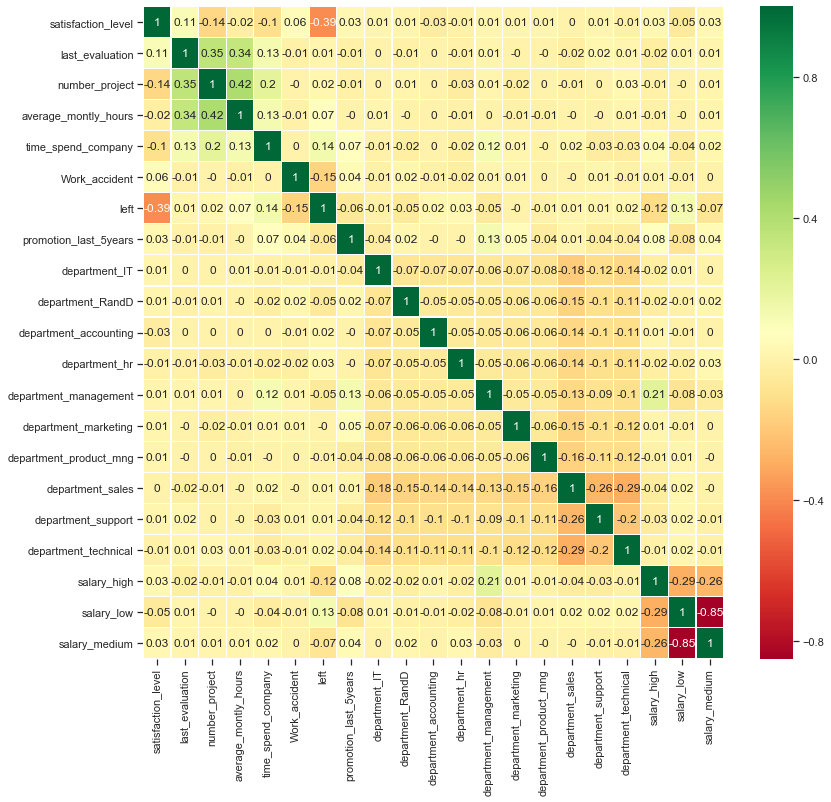

In [211]:
correlation_matrix = data_new.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(13,12)
plt.show()

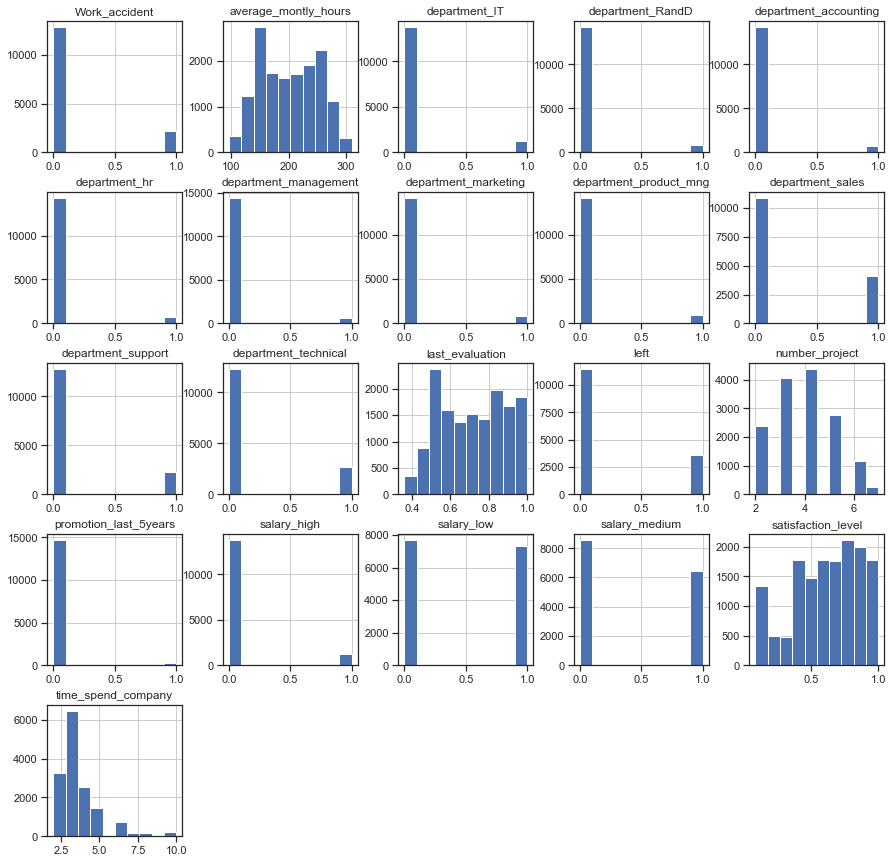

In [212]:
data_new.hist(figsize=(15,15))
plt.show()

# 4.Визуализировать несколько взаимосвязей между переменными.

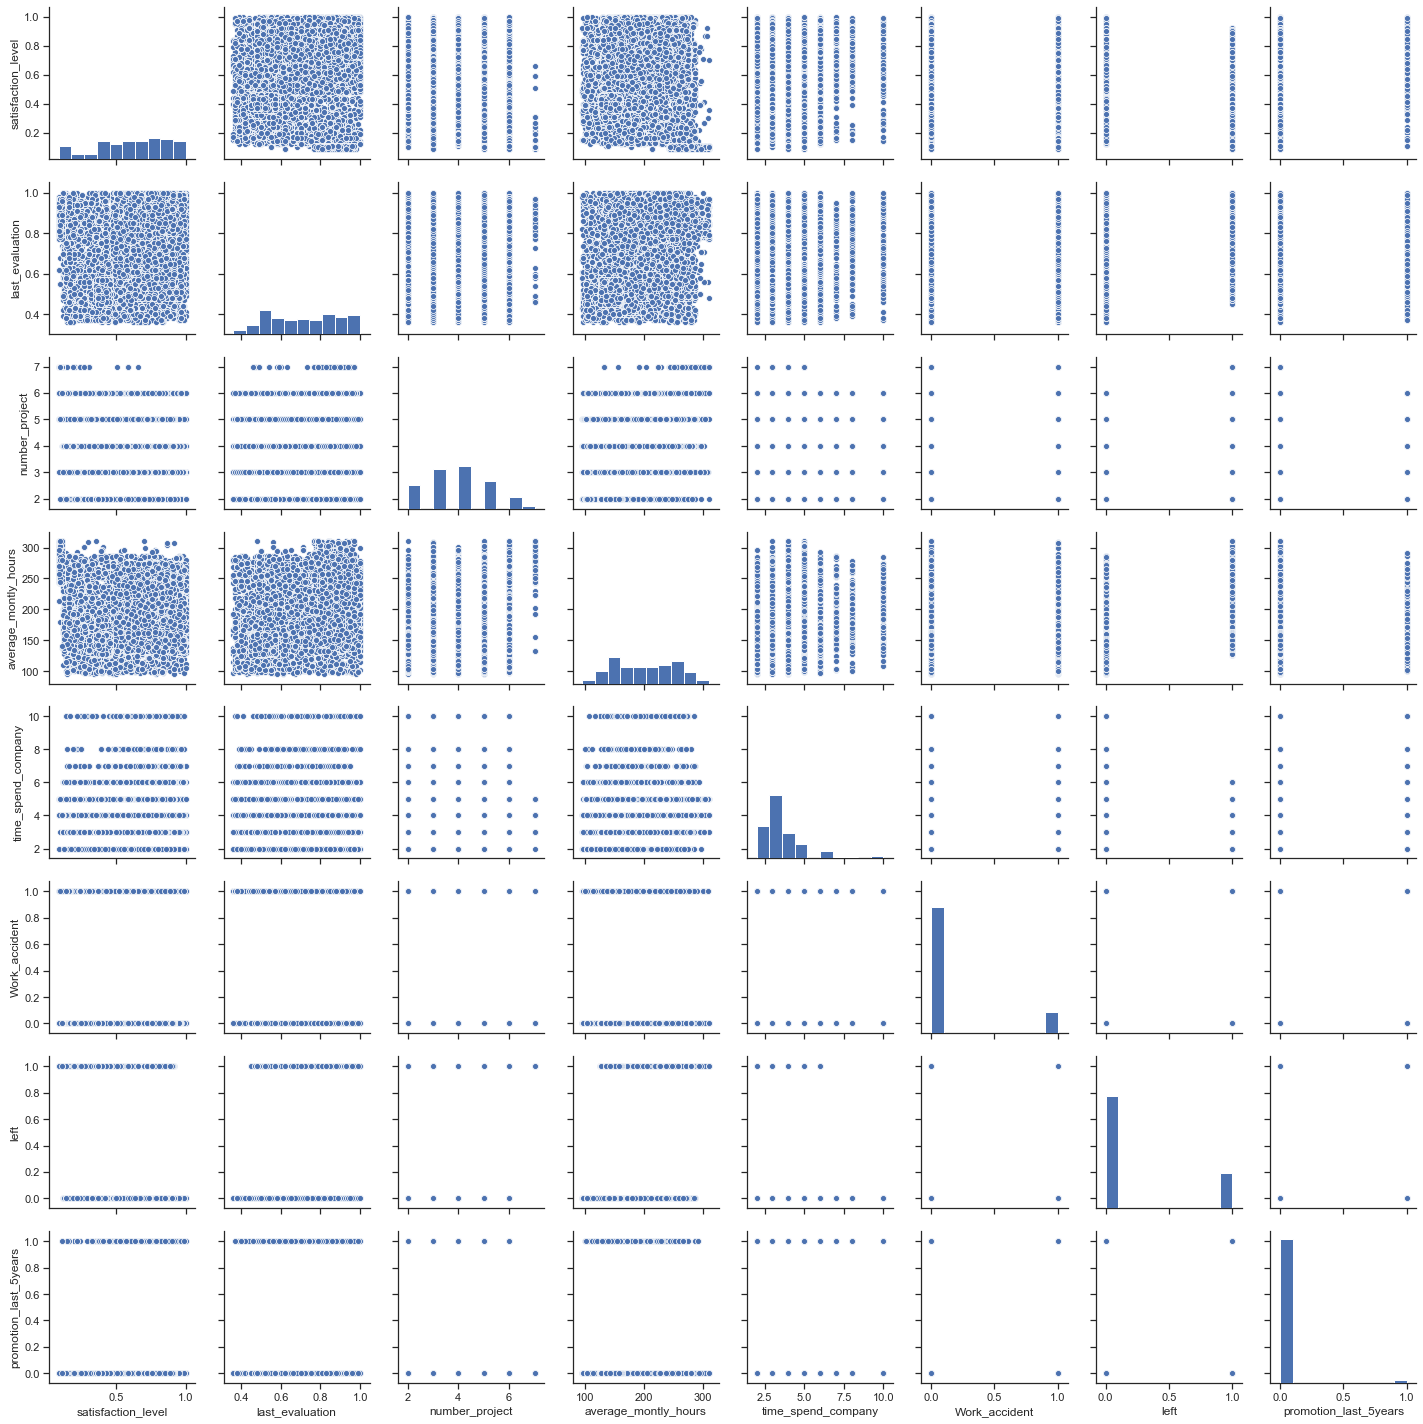

In [213]:
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data, diag_kind='hist')
plt.show()

# 5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [253]:
data_in=data[data['left']==0]['satisfaction_level']
data_out=data[data['left']==1]['satisfaction_level']

Очевидно, что выборки по принципу ушел/не ушел будут сильно отличаться по сильно коррелируемой переменной. Проверяем:

In [254]:
stats.ttest_ind(data_in, data_out)

Ttest_indResult(statistic=51.61280155890104, pvalue=0.0)

pvalue=0, значит отвергаем Н0 о том, что выборки равны. Проведем еще один t-test, различаются ли люди, которые ушли от тех, что остались по выслуге лет

In [255]:
data_in=data[data['left']==0]['time_spend_company']
data_out=data[data['left']==1]['time_spend_company']

In [256]:
stats.ttest_ind(data_in, data_out)

Ttest_indResult(statistic=-17.924210234916142, pvalue=4.207680457692835e-71)

Вывод: также отличаются

# 6.Рассчитать сколько работников работает в каждом департаменте.

In [214]:
departments=dict()
for header in data_new.columns:
    if 'department' in header:
        departments[header]=sum(data_new[header])

In [215]:
departments

{'department_IT': 1227,
 'department_RandD': 787,
 'department_accounting': 767,
 'department_hr': 739,
 'department_management': 630,
 'department_marketing': 858,
 'department_product_mng': 902,
 'department_sales': 4140,
 'department_support': 2229,
 'department_technical': 2720}

In [217]:
#создаю поле для быстрых вычислений
data['count']=1

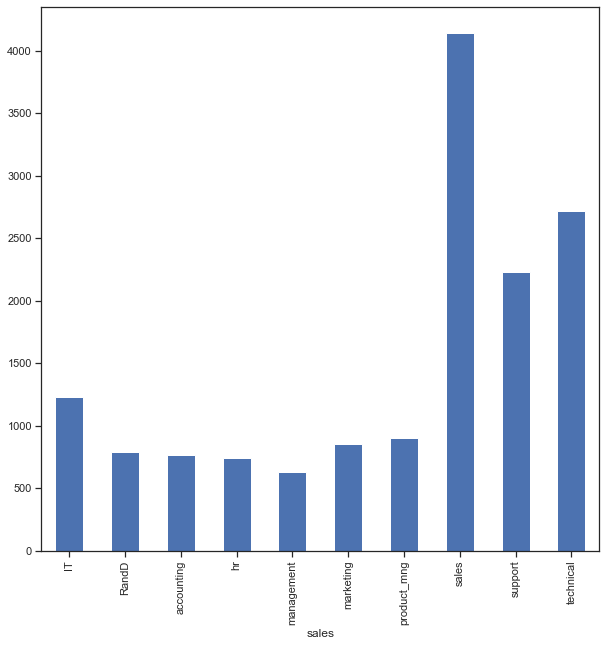

In [219]:
data.groupby(['sales']).count()['count'].plot(kind='bar')

# 7.Показать распределение сотрудников по зарплатам.

In [225]:
salary=dict()
for header in sal.columns:
    if 'salary' in header:
        salary[header]=sum(sal[header])

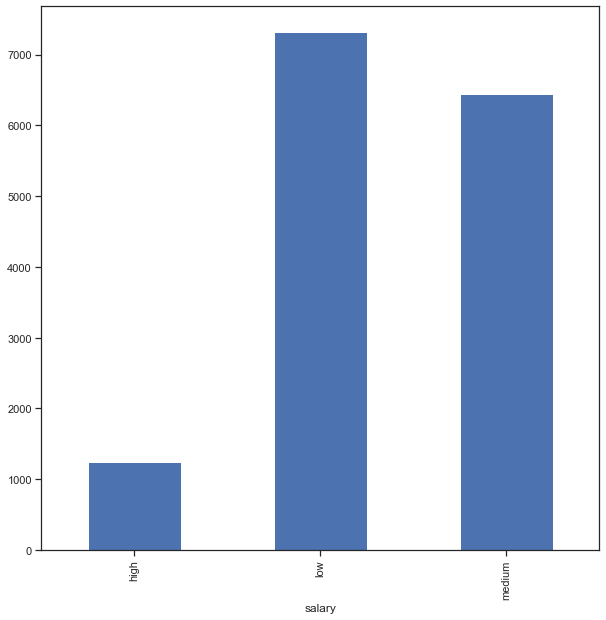

In [222]:
data.groupby(['salary']).count()['count'].plot(kind='bar')

# 8.Показать распределение сотрудников по зарплатам совместно с департаментами.

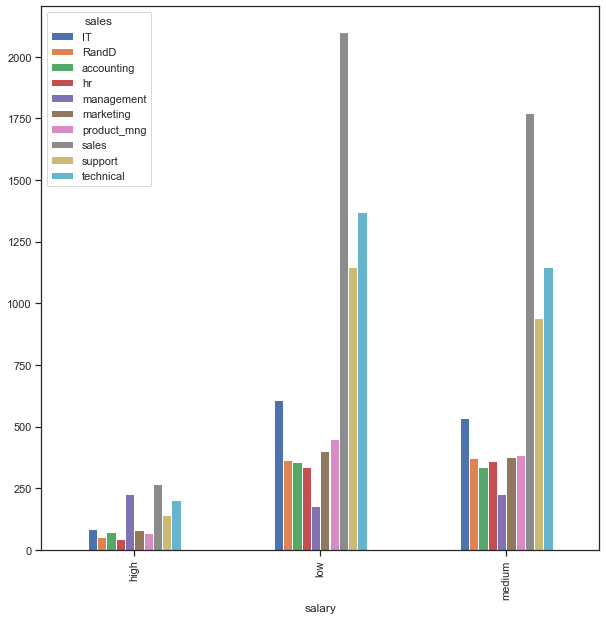

In [223]:
data.groupby(['salary','sales']).count()['count'].unstack().plot(kind='bar')

# 9.Сколько сотрудников покинули компанию.

In [224]:
print('из компании ушло:',sum(data['left']),'или',round(sum(data['left'])/data['left'].count()*100),'%')

из компании ушло: 3571 или 24.0 %


# 10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

In [226]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,count
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


Раздели выборку на покинувших и оставшихся:

In [228]:
data_in=data[data['left']==0]
data_out=data[data['left']==1]

Исследуем, похожи ли выборки по некоторым критериям

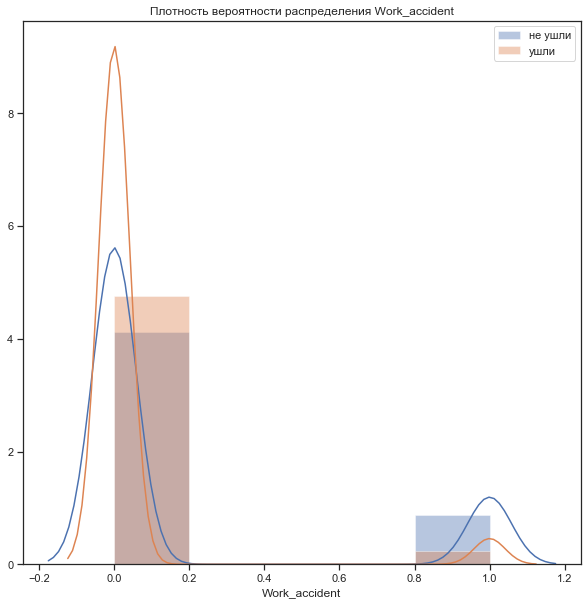

In [242]:
in_=data_in['Work_accident']
out_=data_out['Work_accident']
sns.distplot(in_, bins=5)
sns.distplot(out_, bins=5)
plt.title('Плотность вероятности распределения Work_accident')
plt.legend(['не ушли', 'ушли'])
plt.show()

На глаз, видно, что те, кто попадал в accident уходили, но их далеко не большинство. Проверим через pvalue

In [243]:
stats.ttest_ind(in_, out_)

Ttest_indResult(statistic=19.165804033090176, pvalue=6.613049400453939e-81)

статистически видно, что разница между выборками отсутсвует, значит причина не в Work_accident

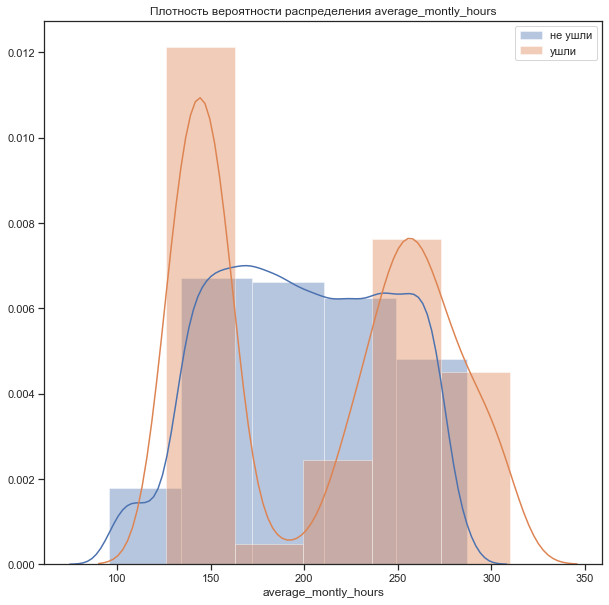

In [244]:
in_=data_in['average_montly_hours']
out_=data_out['average_montly_hours']
sns.distplot(in_, bins=5)
sns.distplot(out_, bins=5)
plt.title('Плотность вероятности распределения average_montly_hours')
plt.legend(['не ушли', 'ушли'])
plt.show()

In [245]:
stats.ttest_ind(in_, out_)

Ttest_indResult(statistic=-8.752254731850009, pvalue=2.3113035567540143e-18)

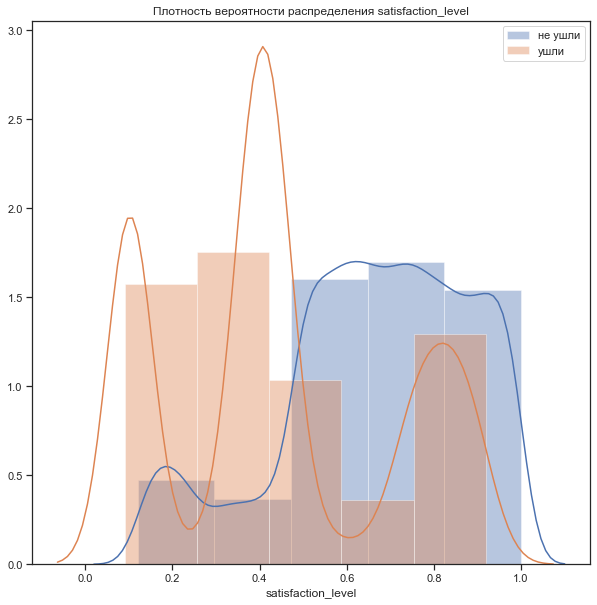

In [246]:
in_=data_in['satisfaction_level']
out_=data_out['satisfaction_level']
sns.distplot(in_, bins=5)
sns.distplot(out_, bins=5)
plt.title('Плотность вероятности распределения satisfaction_level')
plt.legend(['не ушли', 'ушли'])
plt.show()

In [247]:
stats.ttest_ind(in_, out_)

Ttest_indResult(statistic=51.61280155890104, pvalue=0.0)

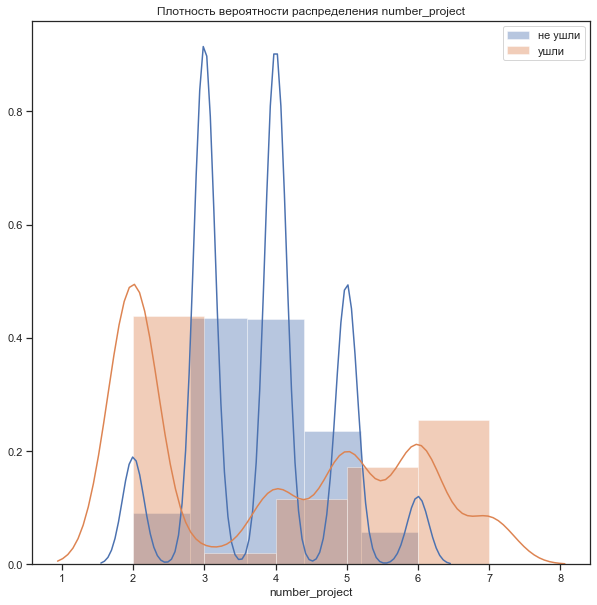

In [248]:
in_=data_in['number_project']
out_=data_out['number_project']
sns.distplot(in_, bins=5)
sns.distplot(out_, bins=5)
plt.title('Плотность вероятности распределения number_project')
plt.legend(['не ушли', 'ушли'])
plt.show()

In [249]:
stats.ttest_ind(in_, out_)

Ttest_indResult(statistic=-2.9138564358459607, pvalue=0.0035752138709418783)

Ответ: судя по графикам и pvalue выборки не похожи. Из визуализаций можно сделать однозначный вывод, что если кол-во проектов (и время работы в месяц) недостаточное или сильно большое, то вероятность, что работник уйдет значительно возрастает